In [78]:
#iphone.csv is the name of the file that is saved in the same directory as this code
df = pd.read_csv("iphone.csv")

In [79]:
#shape of the data set
df.shape

(400, 4)

In [80]:
#assigning values to the variables
age_salary = df.iloc[:,1:-1].values
iphone_purchase = df.iloc[:, 3].values

In [81]:
#training the model
from sklearn.model_selection import train_test_split as test
as_train, as_test, ip_train, ip_test = test(age_salary, iphone_purchase, test_size = 0.25, random_state=1)

In [82]:
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
svm = Pipeline([
("scale", StandardScaler()),
("svm_clf", SVC(kernel="poly", degree=3, coef0=1, C=10))
])
svm.fit(as_train, ip_train)
ip_predict = svm.predict(as_test)
print(ip_predict)

[0 0 1 1 1 0 0 1 0 1 0 0 0 1 1 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 0 0 0 1 0 0 0
 0 1 0 1 1 1 0 1 1 1 1 0 1 0 0 0 1 0 0 1 0 1 1 0 0 1 0 1 1 0 0 1 0 1 0 1 0
 0 1 0 0 0 0 0 1 1 0 0 0 1 0 1 0 1 1 1 0 0 1 1 0 0 0]


In [83]:
#printing the accuracy score of the matrix
from sklearn import metrics
accuracy = metrics.accuracy_score(ip_test, ip_predict)
accuracy = "{:.0%}".format(accuracy)
print('Accuracy score: ', accuracy)

Accuracy score:  88%


In [84]:
#ROC Curve
from sklearn import metrics
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(ip_test, ip_predict)

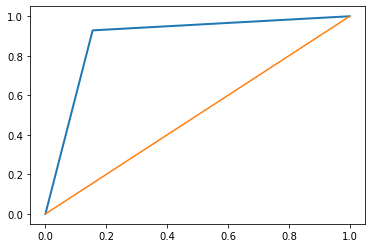

In [86]:
#Plot
import matplotlib.pyplot as plot
plot.plot(fpr, tpr, linewidth=2)
plot.plot([0.0, 1.0], [0.0, 1.0]) 
plot.show()